In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('E:\FTE\Projects\DL\Traffic_Signal_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [70]:
data=[]
labels=[]
#we have 43 classes
classes=43
cur_path=os.getcwd()

In [71]:
cur_path

'E:\\FTE\\Projects\\DL\\Traffic_Signal_Recognition'

 ## Preprocessing the Image

In [72]:
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    for a in images:
        try:
            image=Image.open(path + '\\' + a)
            image=image.resize((30,30))
            #now convert the image into array then append into list
            image=np.array(image)
            data.append(image)   
            labels.append(i)    
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [73]:
data=np.array(data)
labels=np.array(labels)

## Save data & labels for further use

In [74]:
# os.mkdir('Training')
np.save('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/data',data)
np.save('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/target',labels)

In [75]:
data=np.load('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/data.npy')
labels=np.load('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/target.npy')

- Since processing the image again and again takes time so we save the image data for further reference

In [76]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


## Splitting the data for Training and Testing

In [77]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

In [78]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [79]:
y_train

array([ 5,  4, 35, ..., 26, 13,  2])

## Convert labels to onehot encoding

In [80]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [81]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

## Now it's time to build the model

In [82]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
#Since we have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [83]:
#COmpilation of the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#for better accuracy we can change the optimizer and loss

### Train the model

In [84]:
epochs=20
history=model.fit(x_train,y_train,batch_size=32, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.3069 - loss: 3.4401 - val_accuracy: 0.9190 - val_loss: 0.3853
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8105 - loss: 0.6682 - val_accuracy: 0.9580 - val_loss: 0.1690
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.8911 - loss: 0.3861 - val_accuracy: 0.9735 - val_loss: 0.0950
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9145 - loss: 0.2925 - val_accuracy: 0.9730 - val_loss: 0.1038
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9247 - loss: 0.2674 - val_accuracy: 0.9810 - val_loss: 0.0703
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9374 - loss: 0.2311 - val_accuracy: 0.9818 - val_loss: 0.0685
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9357 - loss: 0.2407 - val_accuracy: 0.9843 - val_loss: 0.0538
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9434 - loss: 0.2169 - 

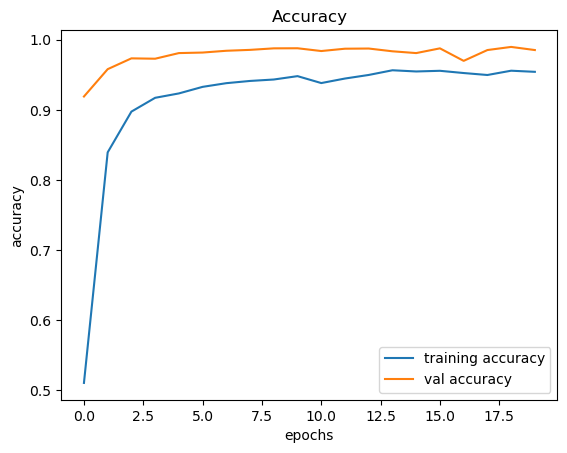

In [85]:
#Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Let's do testing on Test Data

In [86]:
def testing(testcsv):
    y_test=pd.read_csv(testcsv)
    label=y_test['ClassId'].values
    imgs=y_test["Path"].values
    data=[]
    for img in imgs:
        image=Image.open(img)
        image=image.resize((30,30))
        data.append(np.array(image))
    x_test=np.array(data)
    return x_test,label

In [87]:
x_test, label=testing('Test.csv')

In [88]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

## Accuracy with the test data

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,y_pred))

0.957403008709422


### Save the model

In [90]:
model.save('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.keras')

### Load the Model

In [91]:
import os
os.chdir(r'E:\FTE\Projects\DL\Traffic_Signal_Recognition')
from keras.models import load_model
model= load_model('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


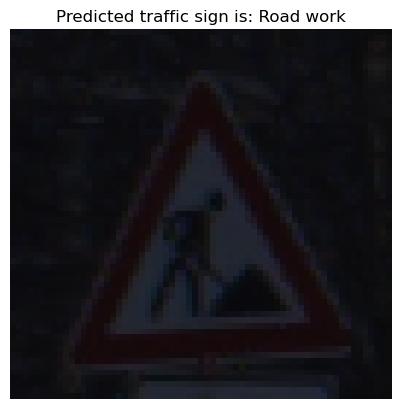

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Dictionary of traffic signs
classes = {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 
           3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 
           6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 
           9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 
           12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 
           16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution', 
           19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 
           22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 
           25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 
           29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 
           32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 
           35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 
           38: 'Keep right', 39: 'Keep left', 40: 'Roundabout mandatory', 
           41: 'End of no passing', 42: 'End no passing veh > 3.5 tons'}

def image_processing(img_path):
    # Load the model
    model = load_model('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.h5')
    
    # Open, resize, and preprocess the image
    image = Image.open(img_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    
    # Make prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Get the class name from the dictionary
    sign = classes[predicted_class]
    
    # Display the image and the predicted class
    plt.imshow(Image.open(img_path))
    plt.title(f"Predicted traffic sign is: {sign}")
    plt.axis('off')
    plt.show()

# Call the function with the test image path
image_processing(r'E:/FTE/Projects/DL/Traffic_Signal_Recognition/Test/00214.png')
